## Klout

In [17]:
import pandas as pd

In [18]:
klout = pd.read_csv('/Users/jacodon/Documents/Data_Analysis/Statistics/Klout_scores.csv', header=None, names = ['Values'])

In [19]:
klout

,Values
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690
...,...
1043,28.544280
1044,16.647022
1045,40.078943
1046,51.085002


In [20]:
klout_list = klout['Values'].tolist()
klout_list

[25.10417915,
 60.9087471,
 23.22223768,
 51.55349118,
 22.62969025,
 53.33809913,
 22.36088208,
 26.51507812,
 52.73731623,
 40.23515157,
 40.78219363,
 23.43875226,
 13.85616705,
 36.86770007,
 36.81844136,
 36.67577959,
 15.38377623,
 13.58380148,
 22.78947155,
 55.32780302,
 13.09508049,
 49.90297065,
 45.23071077,
 70.69758344,
 14.4118898,
 40.17192624,
 51.51803466,
 25.67830398,
 42.4382946,
 13.24425152,
 44.68938392,
 34.22207899,
 26.91918284,
 60.37847016,
 48.47286667,
 49.1759691,
 55.37663832,
 30.50200223,
 52.3895955,
 36.58133368,
 53.39228604,
 13.73291581,
 32.11119941,
 67.30198789,
 42.74307443,
 16.20090097,
 25.89183094,
 59.63868783,
 57.10086924,
 31.38720636,
 28.45163729,
 36.771308,
 50.39171237,
 44.19642043,
 24.59588762,
 18.40643595,
 13.54254262,
 40.32498364,
 22.31705833,
 41.53533502,
 28.86099649,
 17.76413647,
 45.45869651,
 43.20794531,
 57.09889244,
 46.8367035,
 41.19121108,
 14.63775484,
 20.93813373,
 55.38205108,
 43.73677268,
 27.79611731,


In [21]:
def mean(l):
    m = sum(l)/len(l)
    return m

In [22]:
mean(klout_list)

37.719054832538156

In [23]:
def variance(l):
    m = sum(l)/len(l)
    normalized = [(i - m) for i in l]
    normalized_square = [(i)**2 for i in normalized]
    v = sum(normalized_square)/len(normalized_square)
    return v

In [69]:
def std_dev(l):
    v = variance(l)
    std_dev = v**(1/2)
    return std_dev

In [70]:
std_dev(klout_list)

16.036658421715316

In [71]:
import matplotlib.pyplot as plt

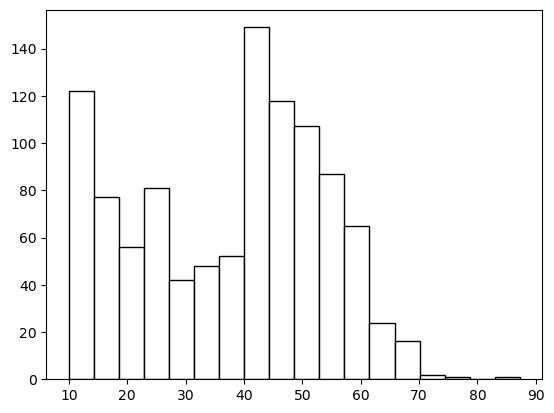

In [72]:
plt.hist(klout_list, bins=18, color='white', edgecolor='black');

Standard deviation of a klout sample of 35 units

In [82]:
def std_dev_of_k_units_sample(l,k):
    std_dev_pop = std_dev(l)
    std_dev_sample = std_dev_pop/((k)**(1/2))
    return std_dev_sample

In [83]:
std_dev_of_k_units_sample(klout_list,35)

2.710690019348119

In [87]:
def z_score(l,k,i):
    mean_pop = mean(l)
    std_dev_sample = std_dev_of_k_units_sample(l,k)
    return (i - mean_pop)/std_dev_sample

In [88]:
l = klout_list
k = 35
i = 40

In [89]:
z_score(l,k,i)

0.841462930538394

The z-score represents how many standard deviations a value (in this case, 40) is away from the mean of the dataset

In [90]:
37.719054832538156 + 2.710690019348119 * 0.841462930538394

40.0

Probability of randomly drawing a sample of size 35 with a mean of at least 40

In [91]:
z_score_of_40 = 0.841462930538394
prob_z_score = 0.7995
prob_at_least_40 = 1 - prob_z_score
print(prob_at_least_40)

0.2005


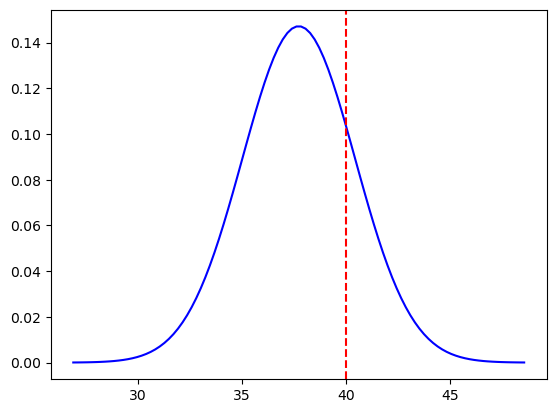

In [93]:
import numpy as np
from scipy.stats import norm

mean_sample = mean(l)
std_error = std_dev_of_k_units_sample(l,k)

x = np.linspace(mean_sample - 4*std_error, mean_sample + 4*std_error, 100)

pdf = norm.pdf(x, mean_sample, std_error)

plt.plot(x, pdf, color='blue')
plt.axvline(i, color='red', linestyle='--')

plt.show()

Probability of randomly drawing a sample of size 250 with a mean of at least 40

In [94]:
l = klout_list
k = 250
i = 40

In [95]:
std_dev_of_k_units_sample(l,k)

1.014247333414829

In [96]:
z_score(l,k,i)

2.2489042783895923

In [97]:
prob_z_score = 0.9875
prob_at_least_40 = 1 - prob_z_score
print(prob_at_least_40)

0.012499999999999956


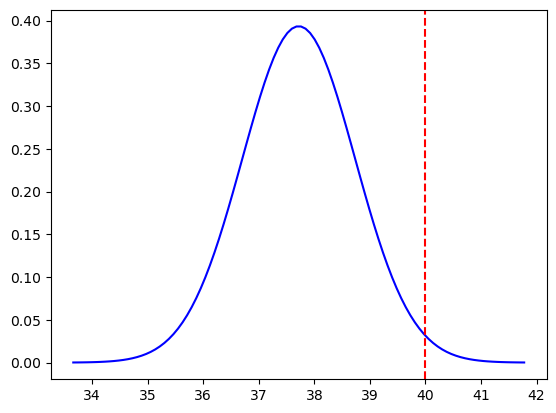

In [98]:
mean_sample = mean(l)
std_error = std_dev_of_k_units_sample(l,k)

x = np.linspace(mean_sample - 4*std_error, mean_sample + 4*std_error, 100)

pdf = norm.pdf(x, mean_sample, std_error)

plt.plot(x, pdf, color='blue')
plt.axvline(i, color='red', linestyle='--')

plt.show()

We know that in a normal distribution, approximately 68% of the data falls within one standard deviation of the mean, about 95% of the data falls within two standard deviations of the mean and approximately 99.7% of the data falls within three standard deviations of the mean.

More precisely, we know from the ZTable that about 95% of the data falls within 1.96 * standard deviations of the mean 

In [126]:
inferior_limit_interval_95 = 40 - 1.96 * std_dev_of_k_units_sample(l,k)
superior_limit_interval_95 = 40 + 1.96 * std_dev_of_k_units_sample(l,k)

print(inferior_limit_interval_95)
print(superior_limit_interval_95)

39.953013336549795
40.046986663450205


Based on the sample, we estimate with 95% confidence that the population mean falls within the interval.

In [127]:
inferior_limit_interval_95 = 40 - 2.33 * std_dev_of_k_units_sample(l,k)
superior_limit_interval_95 = 40 + 2.33 * std_dev_of_k_units_sample(l,k)

print(inferior_limit_interval_95)
print(superior_limit_interval_95)

39.9441434051842
40.0558565948158


## Engagement Ratio

In [112]:
engagement_ratio = pd.read_csv('/Users/jacodon/Documents/Data_Analysis/Statistics/Engagement_ratio.csv', header=None, names = ['Values'])

In [113]:
engagement_ratio_list = engagement_ratio['Values'].tolist()
engagement_ratio_list

[0.000149213,
 0.032047036,
 0.07161051,
 0.120724501,
 0.004766242,
 0.005118918,
 0.019827659,
 0.002235466,
 0.004187593,
 0.047041231,
 0.000232894,
 0.07137651,
 0.195381825,
 0.039534795,
 0.034413996,
 0.027055648,
 0.013206822,
 0.049923823,
 0.017533947,
 0.284867081,
 0.087476606,
 0.065508885,
 0.256177758,
 0.007440478,
 0.114434305,
 0.16243617,
 0.194027271,
 0.017937145,
 0.017873097,
 0.029395768,
 0.046764435,
 0.002422778,
 0.011856738,
 0.050837929,
 0.003129872,
 0.102321773,
 0.024718843,
 8.79e-05,
 0.001497728,
 0.018105617,
 0.009357905,
 0.171216145,
 0.712549753,
 4.86e-07,
 0.051557831,
 0.031573962,
 0.194434436,
 0.097589792,
 0.003039774,
 0.087565481,
 0.061021027,
 0.167202123,
 0.013543773,
 0.114275309,
 0.00674439,
 0.007010104,
 0.017162446,
 0.011515279,
 0.035227814,
 0.001794599,
 0.034835781,
 0.123997298,
 0.117972289,
 0.040041241,
 0.000891651,
 0.11153045,
 0.023430447,
 0.007622058,
 0.237556146,
 0.249692461,
 0.195092234,
 0.073502472,
 0.

In [114]:
l = engagement_ratio_list

In [115]:
mean(l)

0.07726584465256944

In [116]:
std_deviation(l)

0.10720956480669143

Let's introduce an external factor that could affect the population mean and variance, and let's investigate it through a sample size of 20. We know that the sample mean is 0.13

In [122]:
mean_sample = 0.13

In [123]:
k = 20

In [124]:
std_dev_of_k_units_sample(l,k)

0.023972787474593114

In [125]:
inferior_limit_interval_95 = mean_sample - 1.96 * std_dev_of_k_units_sample(l,k)
superior_limit_interval_95 = mean_sample + 1.96 * std_dev_of_k_units_sample(l,k)

print(inferior_limit_interval_95)
print(superior_limit_interval_95)

0.0830133365497975
0.1769866634502025


The population mean of 0.077 falls outside the 95% confidence interval of the sample (0.083 - 0.176). Therefore, we can conclude that the external factor has significantly affected the population.